In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# !pip install -U mglearn
# !pip install --upgrade joblib==1.1.0
# !pip install kagglehub

In [4]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("muratkokludataset/acoustic-extinguisher-fire-dataset")

# print("Path to dataset files:", path)

EXPLORATORY DATA ANALYSIS

DATA EXPLORING AND INVESTIGATION

In [32]:
file_path = "Acoustic_Extinguisher_Fire_Dataset.xlsx"
dataset = pd.read_excel(file_path)
dataset2 = dataset.copy()
dataset.head()


,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [6]:
fuel_mapping = {
    'gasoline': 1,
    'kerosene': 2,
    'thinner': 3,
    'lpg': 4
}
dataset['FUEL'] = dataset['FUEL'].replace(fuel_mapping)
print(dataset['FUEL'].unique())
dataset.head()

[1 3 2 4]


,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,1,10,96,0.0,75,0
1,1,1,10,96,0.0,72,1
2,1,1,10,96,2.6,70,1
3,1,1,10,96,3.2,68,1
4,1,1,10,109,4.5,67,1


<Axes: >

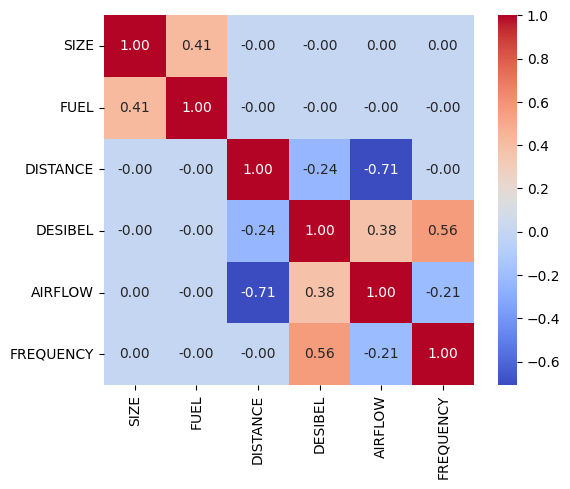

In [7]:
corr_matrix = dataset.drop(columns=['STATUS']).corr()
# plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
# plt.title('Correlation Matrix of Features')
# plt.show()

Text(0.5, 1.02, 'Pairwise Feature Relationships Colored by STATUS')

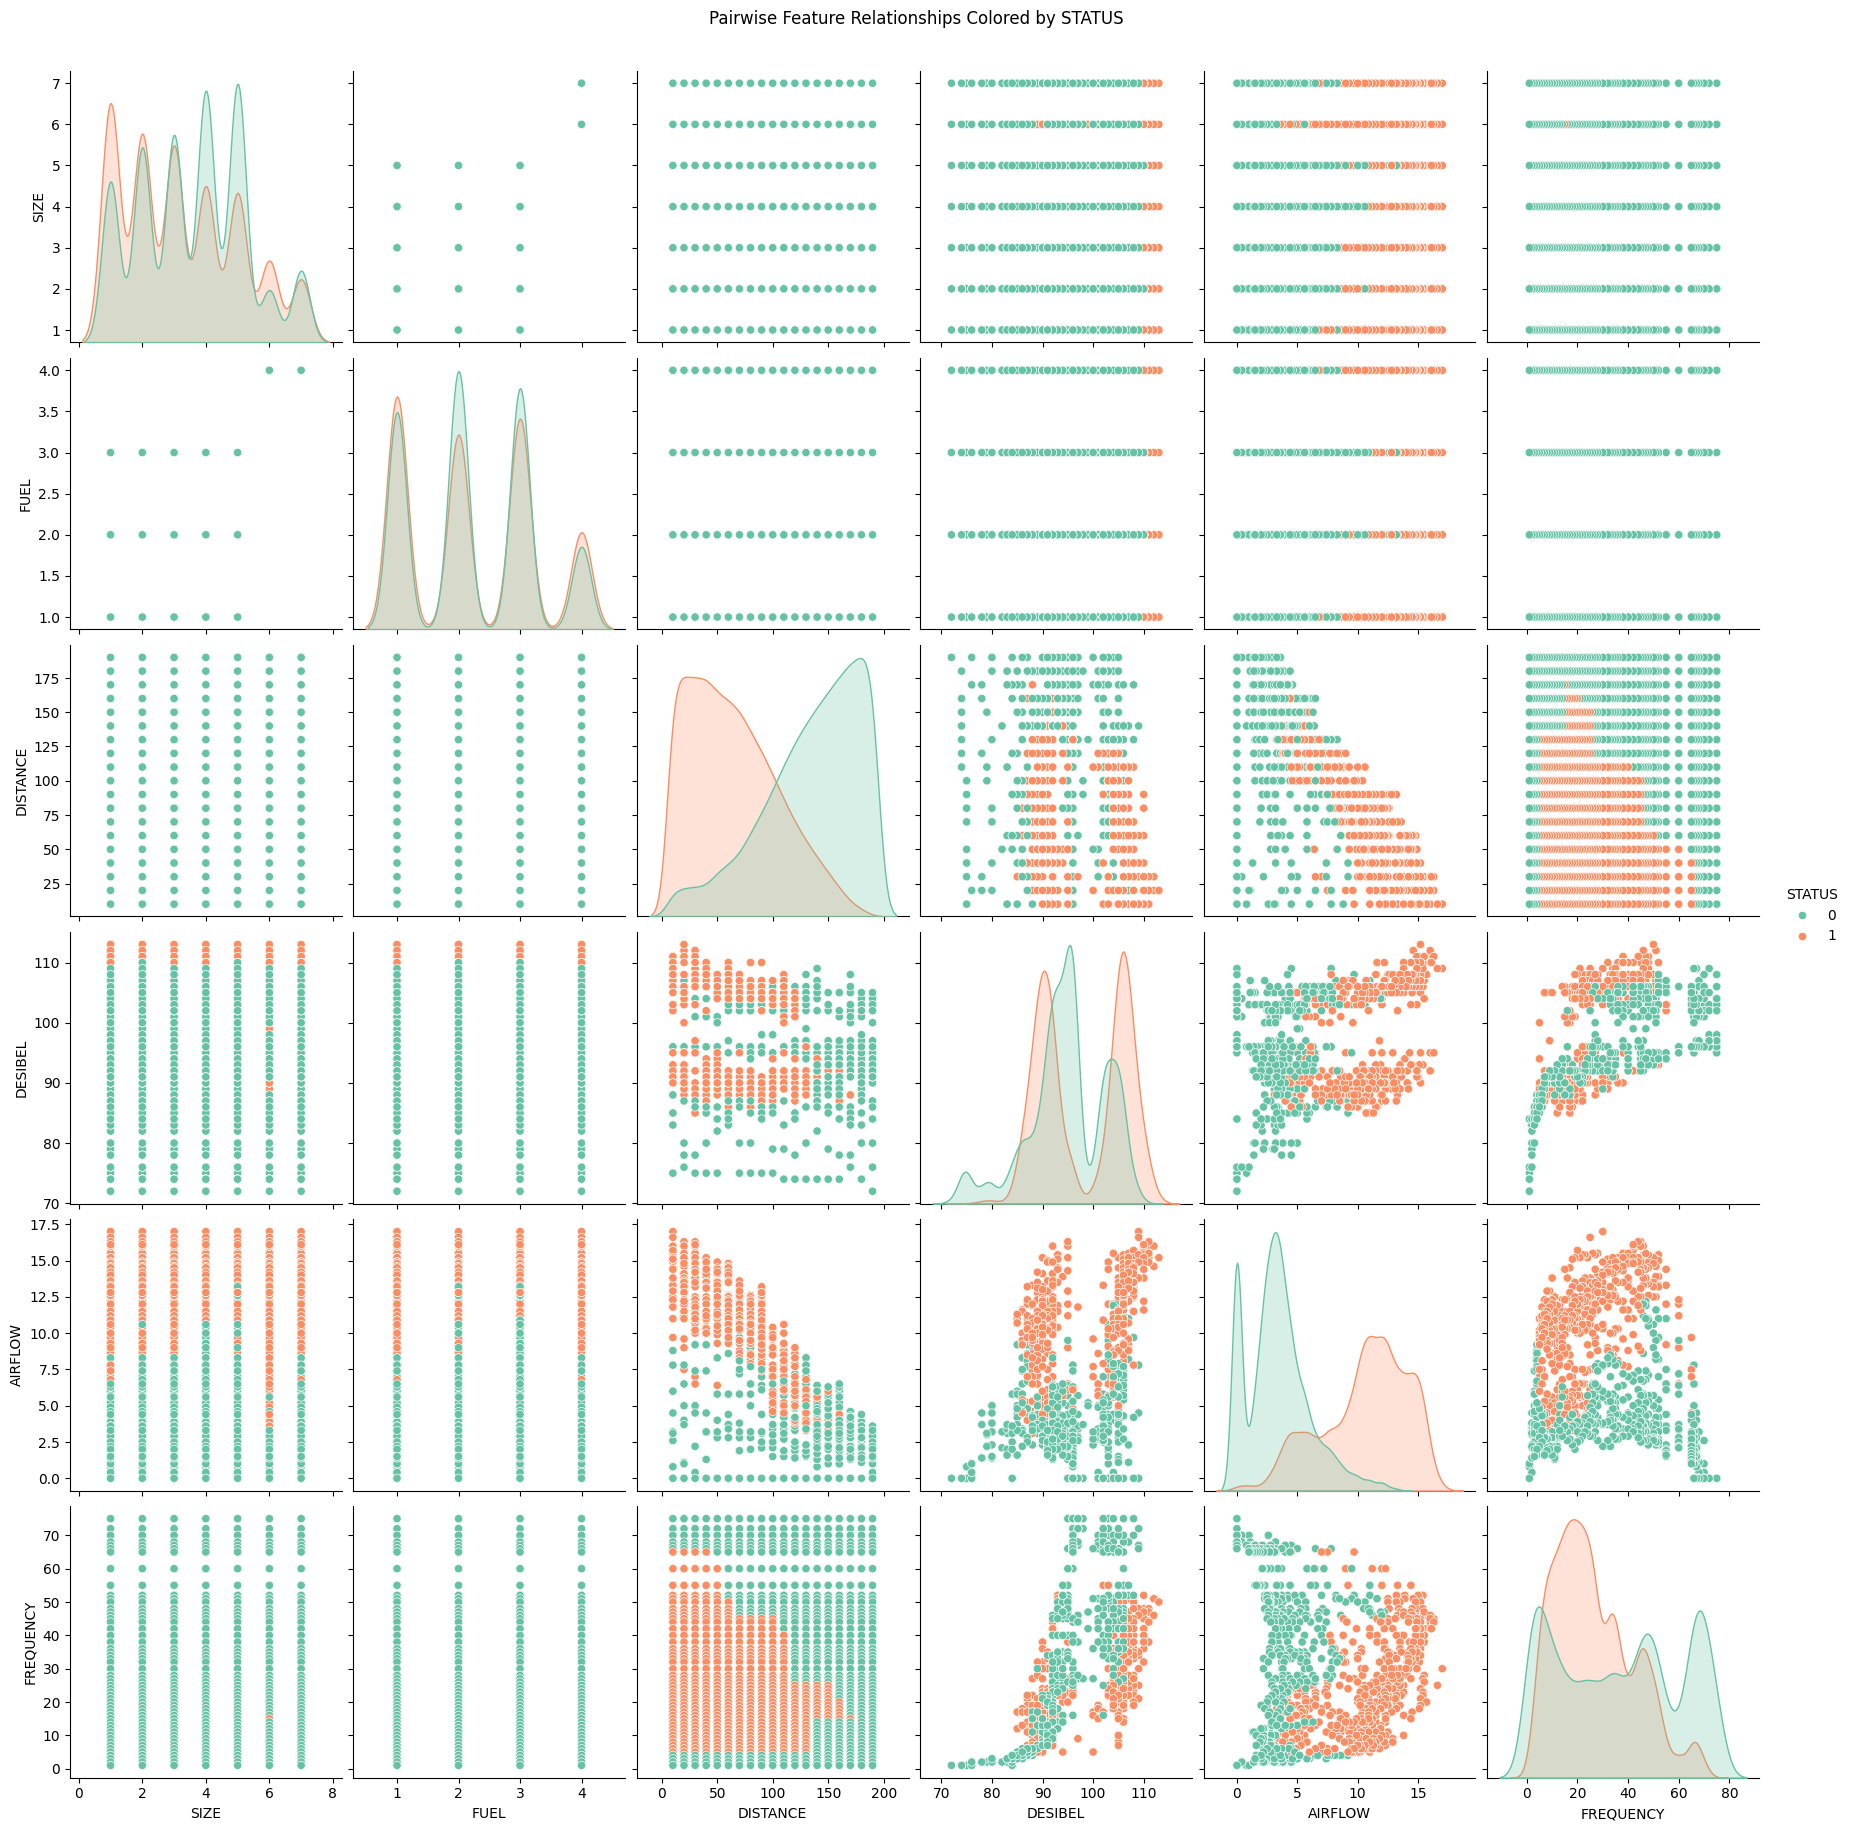

In [8]:
# plt.style.use('seaborn-dark-palette')
pairplot = sns.pairplot(dataset, hue='STATUS', height=3, palette='Set2', diag_kind='kde')
pairplot.fig.suptitle('Pairwise Feature Relationships Colored by STATUS', y=1.02)


KNN CLASSIFICATION

In [9]:
dataset.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,1,10,96,0.0,75,0
1,1,1,10,96,0.0,72,1
2,1,1,10,96,2.6,70,1
3,1,1,10,96,3.2,68,1
4,1,1,10,109,4.5,67,1


In [10]:
from sklearn.model_selection import train_test_split
# X, y = mglearn.datasets.dataset #Here is the data, we can get this from excel sheet or SQL
X = dataset.loc[:,'SIZE':'FREQUENCY']
y = dataset['STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) #split into train =75%, test =25%

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) #Parameter for kNN
clf.fit(X_train, y_train) #Fit the data

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Train set accuracy: 0.93
Test set accuracy: 0.92


In [13]:
X.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,1,10,96,0.0,75
1,1,1,10,96,0.0,72
2,1,1,10,96,2.6,70
3,1,1,10,96,3.2,68
4,1,1,10,109,4.5,67


c:\Users\Enzo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\Enzo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\Enzo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\Enzo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\Enzo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid featur

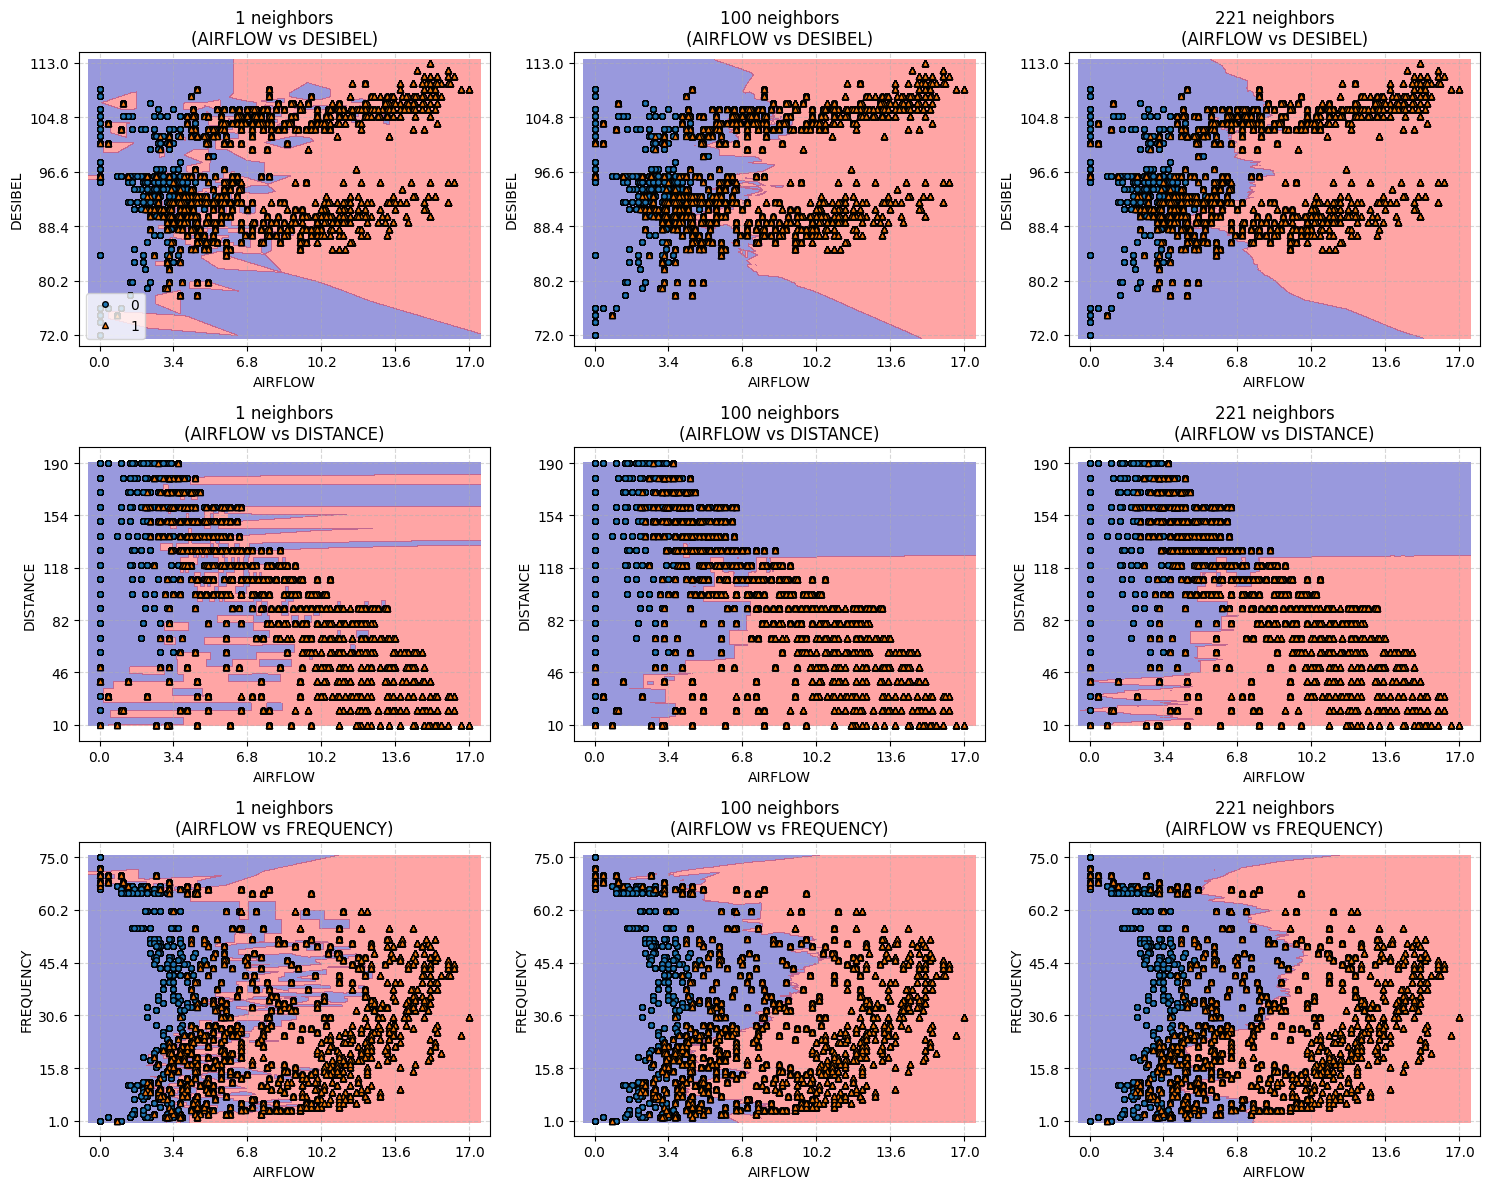

In [31]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn

# 👇 Define the feature combinations you want to try
feature_combinations = [
    ["AIRFLOW", "DESIBEL"],   # replace with actual column names
    ["AIRFLOW", "DISTANCE"],   # another pair
    ["AIRFLOW", "FREQUENCY"]    # and another
]

# 👇 Define the neighbor settings you want to compare
neighbor_settings = [1, 100, 221]

# Create subplot grid: rows = feature pairs, cols = neighbor settings
fig, axes = plt.subplots(len(feature_combinations), len(neighbor_settings),
                         figsize=(5*len(neighbor_settings), 4*len(feature_combinations)))

# Ensure axes is always 2D (even if just one row/col)
if len(feature_combinations) == 1:
    axes = [axes]  # make rows iterable
if len(neighbor_settings) == 1:
    axes = [[ax] for ax in axes]

# Loop through feature pairs (rows)
for row_idx, (feat_x, feat_y) in enumerate(feature_combinations):
    X_plot = X[[feat_x, feat_y]]   # pick two features
    y_plot = y

    # Loop through neighbor settings (cols)
    for col_idx, n_neighbors in enumerate(neighbor_settings):
        ax = axes[row_idx][col_idx]

        # Fit classifier
        clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_plot, y_plot)

        # Plot decision boundary
        mglearn.plots.plot_2d_separator(clf, X_plot.values, fill=True, eps=0.5, ax=ax, alpha=.4)

        # Scatter plot
        mglearn.discrete_scatter(X_plot[feat_x], X_plot[feat_y], y_plot, ax=ax, s=4)

        # Titles and labels
        
        ax.set_title(f"{n_neighbors} neighbors\n({feat_x} vs {feat_y})")
        ax.set_xlabel(feat_x)
        ax.set_ylabel(feat_y)
        ax.set_xticks(np.linspace(X_plot[feat_x].min(), X_plot[feat_x].max(), 6))
        ax.set_yticks(np.linspace(X_plot[feat_y].min(), X_plot[feat_y].max(), 6))
        ax.grid(True, linestyle="--", alpha=0.5)
        # ax.set_xticks(np.linspace(X[:, 0].min(), X[:, 0].max(), 6))
        # ax.set_yticks(np.linspace(X[:, 1].min(), X[:, 1].max(), 6))

        # Add legend only once (top-left subplot)
        if row_idx == 0 and col_idx == 0:
            ax.legend(loc=3)

plt.tight_layout()
plt.show()


MODEL VALIDATION

In [23]:
from sklearn.model_selection import KFold

# we define k-fold Cross-validation with 10 folds
number_folds = 10
kf = KFold(n_splits=number_folds, shuffle=True, random_state=1337)

In [ ]:
# lahat_training = pd.DataFrame()
# lahat_test = pd.DataFrame()
# fold = 0

# X = dataset.loc[:,'SIZE':'FREQUENCY']
# y = dataset['STATUS']

# # Compared to Method 0, this line is the only difference.
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     training_accuracy = []
#     test_accuracy = []
#     neighbors_settings = list(range(1, 101, 4)) # try n_neighbors from 1 to 50

#     for n_neighbors in neighbors_settings:
#         clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
#         clf.fit(X_train, y_train)

#         training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
#         test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy

#     lahat_training[fold] = training_accuracy
#     lahat_test[fold] = test_accuracy
#     fold += 1

In [ ]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
fold = 0

X = dataset.loc[:, 'SIZE':'FREQUENCY']
y = dataset['STATUS']

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Example 5-fold CV

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = list(range(1, 500, 10))  # try n_neighbors = 1, 5, 9, ..., 97

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))

    lahat_training[fold] = training_accuracy
    lahat_test[fold] = test_accuracy
    fold += 1

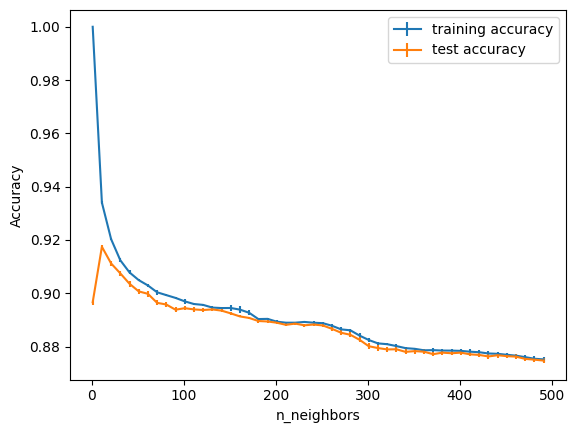

In [64]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/8, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [30]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=neighbors_settings,
        y=lahat_training.mean(axis=1),
        mode="lines+markers",
        name="Training accuracy",
        error_y=dict(
            type="data",
            array=lahat_training.std(axis=1) / 2,
            visible=True
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=neighbors_settings,
        y=lahat_test.mean(axis=1),
        mode="lines+markers",
        name="Test accuracy",
        error_y=dict(
            type="data",
            array=lahat_test.std(axis=1) / 8,
            visible=True
        )
    )
)

fig.update_layout(
    xaxis_title="n_neighbors",
    yaxis_title="Accuracy"
)

fig.show()

In [72]:
print("Best test set mean accuracy: {:.2f}%".format(lahat_test.mean(axis = 1).max() * 100))
print("For k = {}".format(lahat_test.mean(axis = 1).argmax() + 1))

Best test set mean accuracy: 92.20%
For k = 2


Principle Chance Criterion

Population per class:      0
0  8759
1  8683
Proportion Chance Criterion: 50.00%
1.25 * Proportion Chance Criterion: 62.50%


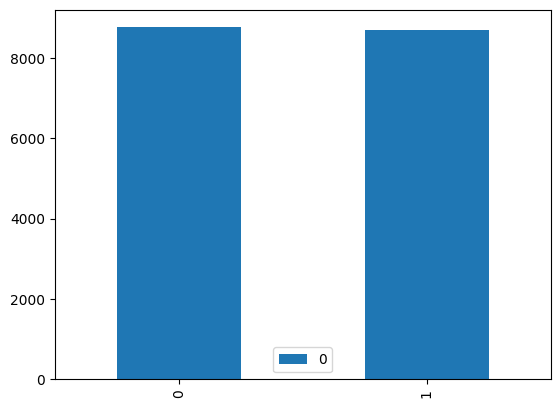

In [73]:
import numpy as np
from collections import Counter
state_counts = Counter(y)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

### Using Hot Encoding Dataset

In [33]:
dataset2.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


<Axes: >

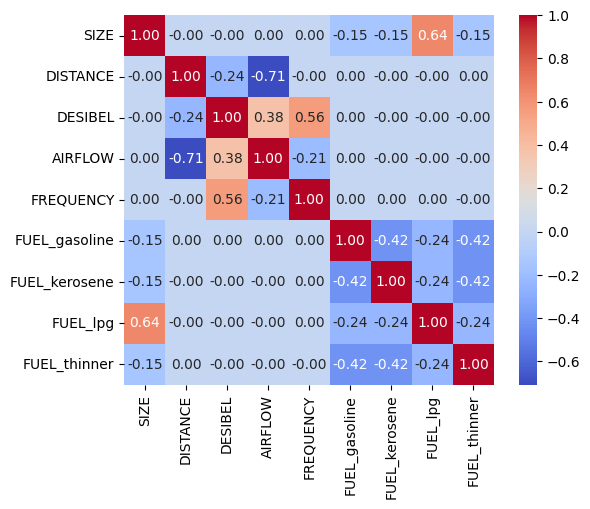

In [36]:
# one-hot encode Fuel (keeps a column for each fuel type)
dataset_ohe = pd.get_dummies(dataset2, columns=["FUEL"], drop_first=False, dtype=int)

# then drop STATUS and compute correlations on the numeric features
corr_matrix = dataset_ohe.drop(columns=["STATUS"]).corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)

Text(0.5, 1.02, 'Pairwise Feature Relationships Colored by STATUS')

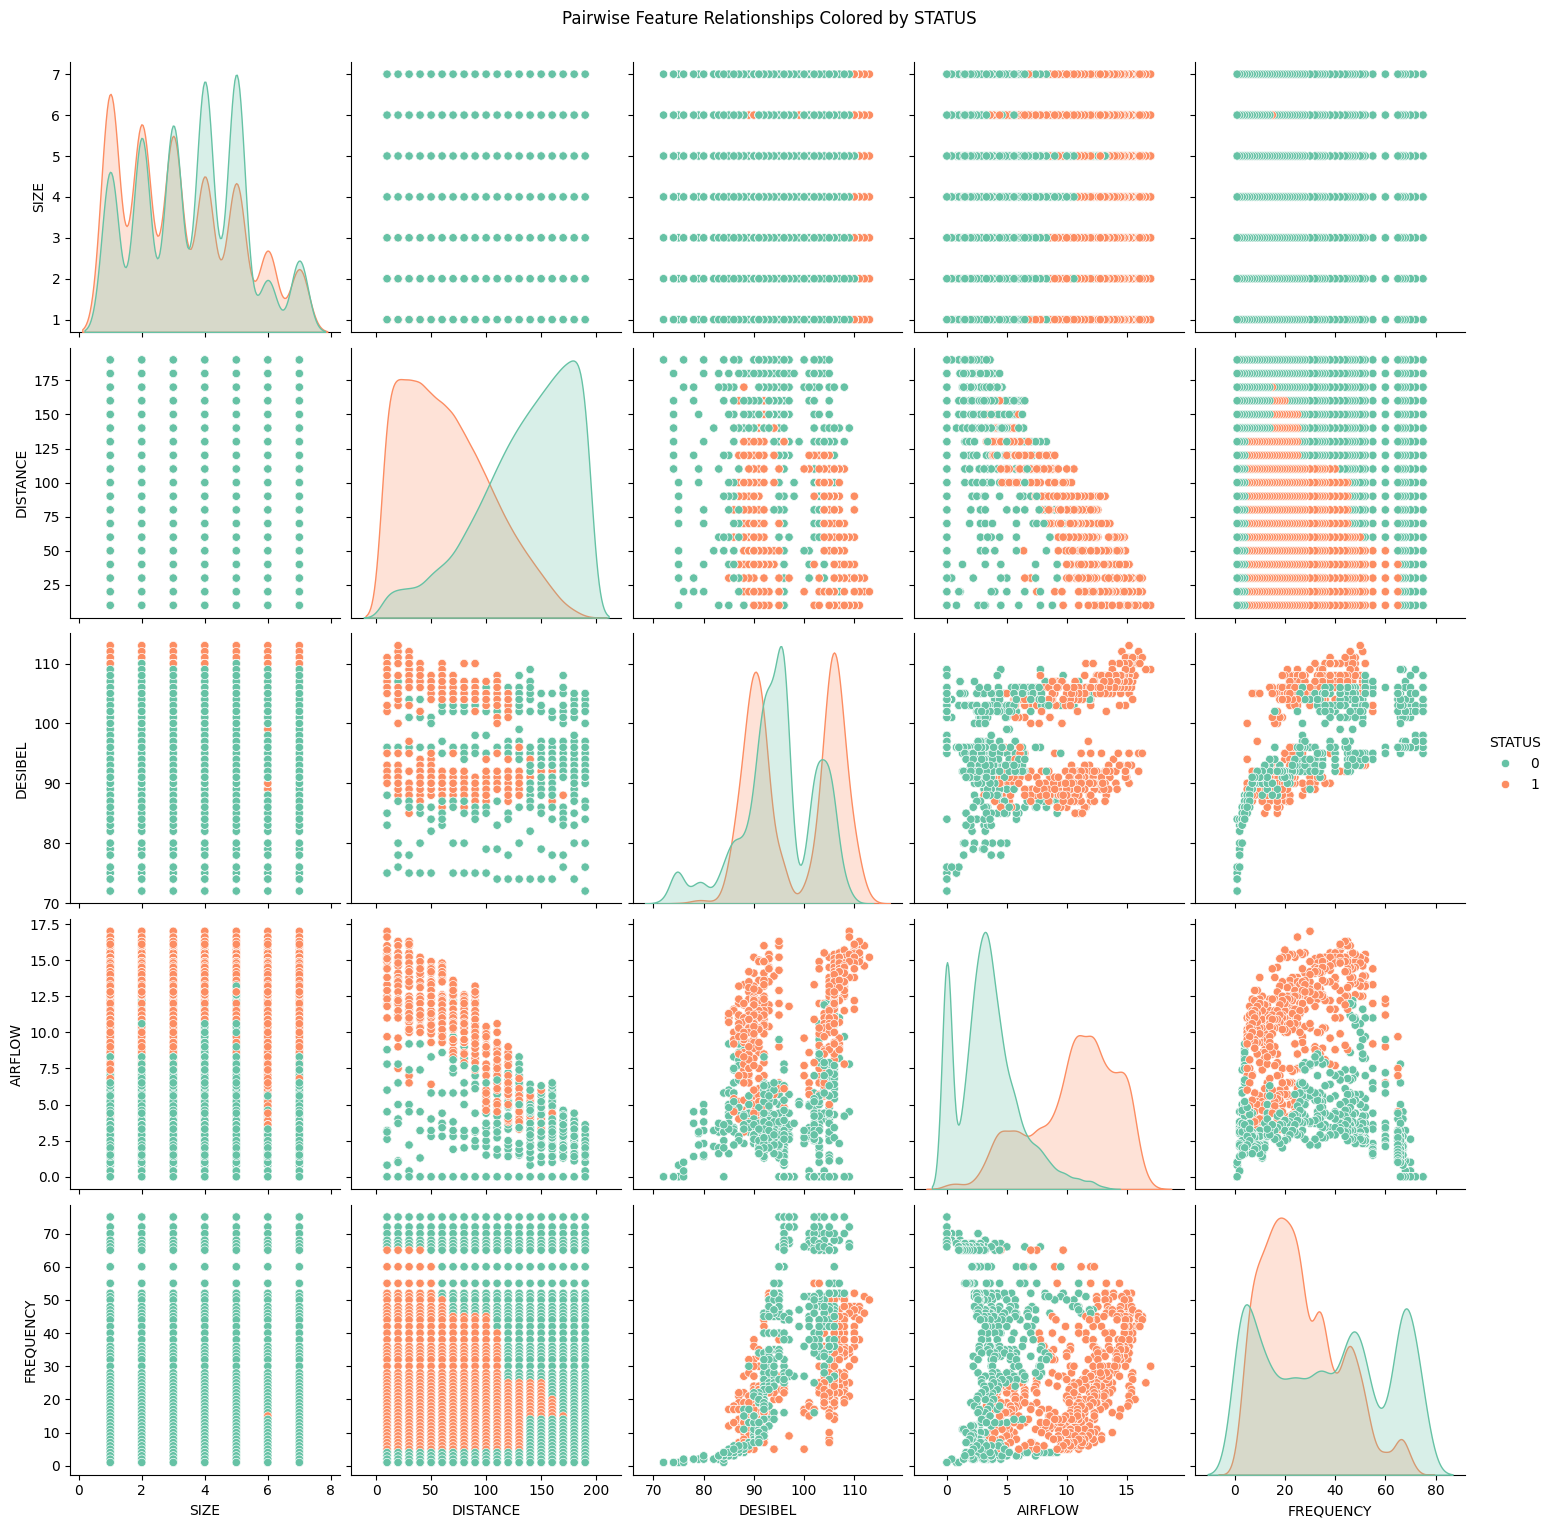

In [38]:
pairplot = sns.pairplot(dataset2, hue='STATUS', height=3, palette='Set2', diag_kind='kde')
pairplot.fig.suptitle('Pairwise Feature Relationships Colored by STATUS', y=1.02)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# X, y = mglearn.datasets.dataset #Here is the data, we can get this from excel sheet or SQL
X = dataset2.loc[:,'SIZE':'FREQUENCY']
y = dataset2['STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) #split into train =75%, test =25%

categorical_cols = ["FUEL"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]


In [53]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

knn_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
knn_pipe.fit(X_train, y_train)
print("Test accuracy:", knn_pipe.score(X_test, y_test))

Test accuracy: 0.9587250630589315


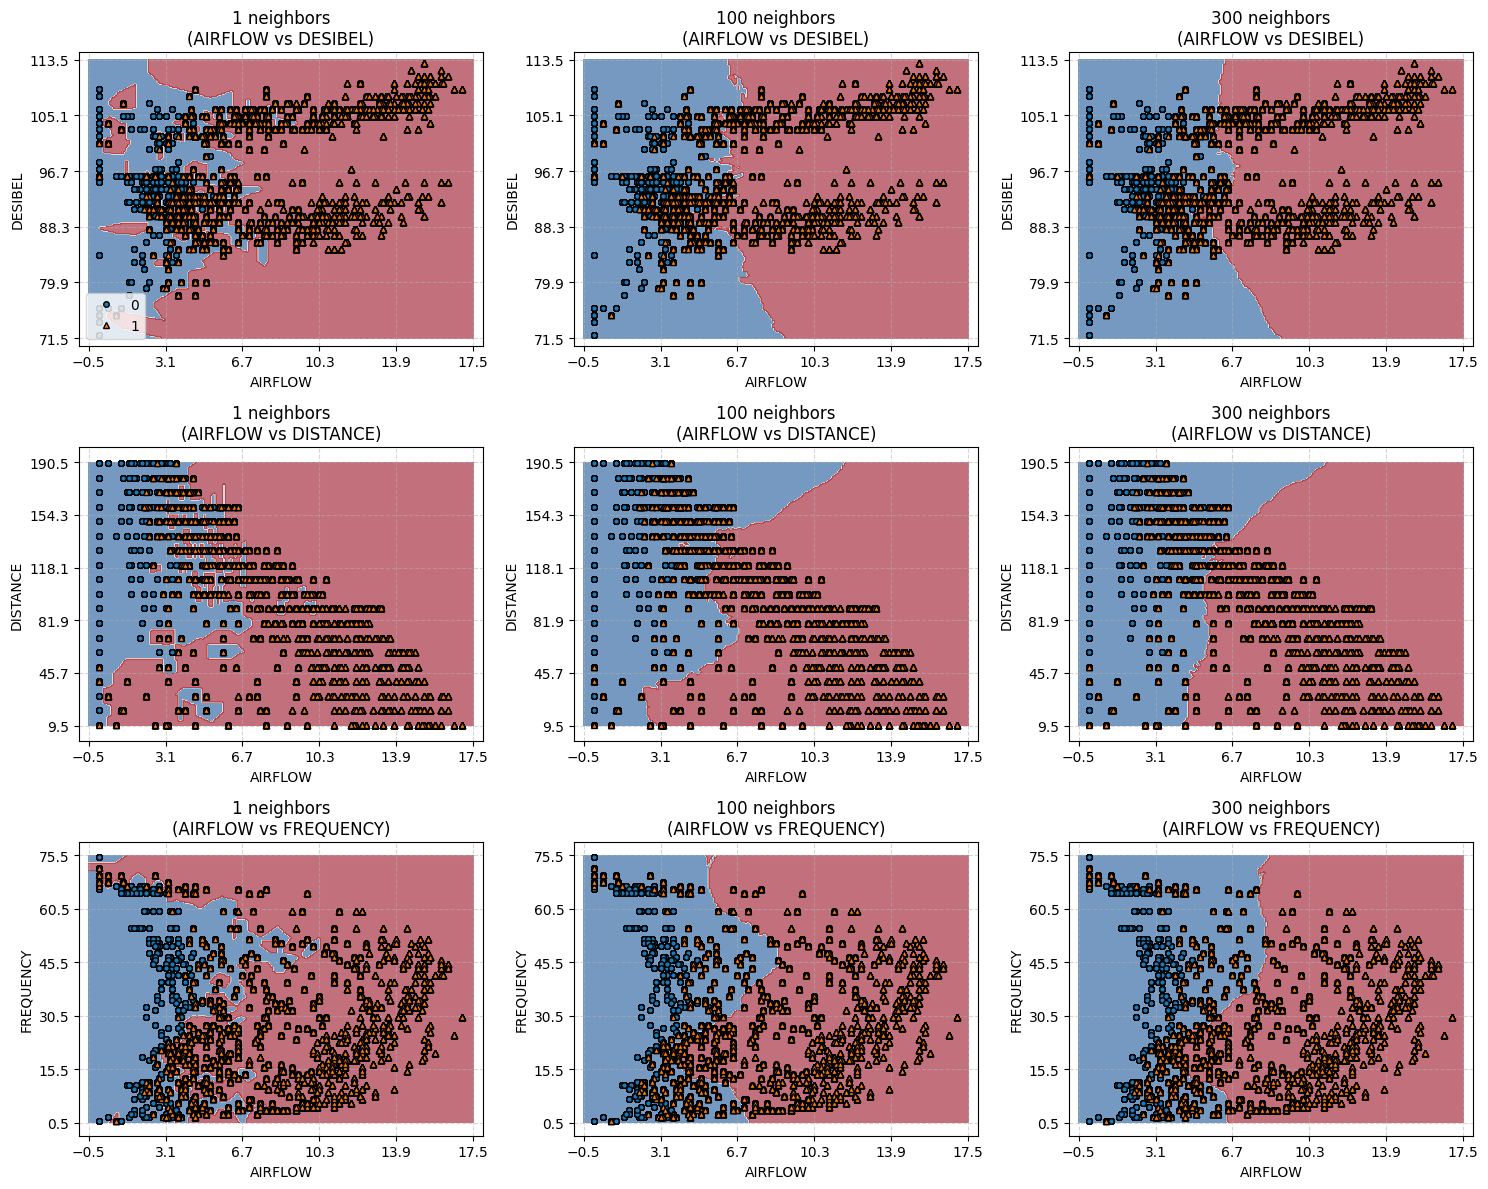

In [65]:

feature_combinations = [
    ["AIRFLOW", "DESIBEL"],
    ["AIRFLOW", "DISTANCE"],
    ["AIRFLOW", "FREQUENCY"]
]
neighbor_settings = [1, 100, 300]
categorical_cols = ["FUEL"]

fig, axes = plt.subplots(len(feature_combinations), len(neighbor_settings),
                         figsize=(5 * len(neighbor_settings), 4 * len(feature_combinations)))

# keep axes 2‑D
axes = np.atleast_2d(axes)

mode_fuel = X["FUEL"].mode().iloc[0]  # value used for the grid

for row_idx, (feat_x, feat_y) in enumerate(feature_combinations, start=0):
    numeric_cols = [feat_x, feat_y]
    cols_for_fit = numeric_cols + categorical_cols
    X_subset = X[cols_for_fit].copy()
    y_subset = y

    preprocess = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("num", StandardScaler(), numeric_cols)
        ],
        remainder="drop"
    )

    pipe = Pipeline(
        steps=[
            ("preprocess", preprocess),
            ("knn", KNeighborsClassifier())
        ]
    )

    for col_idx, n_neighbors in enumerate(neighbor_settings, start=0):
        ax = axes[row_idx, col_idx]

        pipe.set_params(knn__n_neighbors=n_neighbors)
        pipe.fit(X_subset, y_subset)

        x_min, x_max = X_subset[feat_x].min() - 0.5, X_subset[feat_x].max() + 0.5
        y_min, y_max = X_subset[feat_y].min() - 0.5, X_subset[feat_y].max() + 0.5
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, 200),
            np.linspace(y_min, y_max, 200)
        )

        grid = pd.DataFrame({
            feat_x: xx.ravel(),
            feat_y: yy.ravel(),
            "FUEL": mode_fuel  # keeps categorical input valid
        })
        Z = pipe.predict(grid).reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.6, cmap="RdBu_r")
        mglearn.discrete_scatter(
            X_subset[feat_x],
            X_subset[feat_y],
            y_subset,
            ax=ax,
            s=4
        )

        ax.set_title(f"{n_neighbors} neighbors\n({feat_x} vs {feat_y})")
        ax.set_xlabel(feat_x)
        ax.set_ylabel(feat_y)
        ax.set_xticks(np.linspace(x_min, x_max, 6))
        ax.set_yticks(np.linspace(y_min, y_max, 6))
        ax.grid(True, linestyle="--", alpha=0.5)

        if row_idx == 0 and col_idx == 0:
            ax.legend(loc=3)

plt.tight_layout()
plt.show()

In [ ]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
fold = 0

X = dataset.loc[:, 'SIZE':'FREQUENCY']
y = dataset['STATUS']

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Example 5-fold CV

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = list(range(1, 500, 10))  # try n_neighbors = 1, 5, 9, ..., 97

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))

    lahat_training[fold] = training_accuracy
    lahat_test[fold] = test_accuracy
    fold += 1